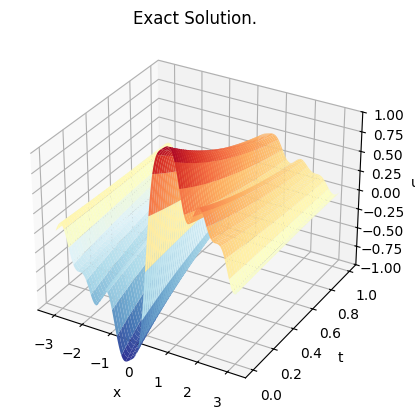

In [6]:
#画图
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator
import matplotlib.pyplot as plt
import sys
sys.path.append('H:/毕业论文/pykan')
sys.path.append('H:/毕业论文/efficient-kan/src')
from scipy.interpolate import griddata
from efficient_kan import KAN as EKAN
from kan import KAN, LBFGS
import torch
import torch.nn as nn
from torch import autograd
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

def output_transform(coords):
    x = coords[:,0]
    t = coords[:,1]
    return (
        np.exp(-t)*(np.sin(x) + np.sin(2*x)/2 + np.sin(3*x)/3+ np.sin(4*x)/4+ np.sin(8*x)/8)
   )

x = np.linspace(-np.pi, np.pi, 256)
t = np.linspace(0, 1, 100)
ms_x, ms_t = np.meshgrid(x, t)
x = np.ravel(ms_x).reshape(-1, 1)
t = np.ravel(ms_t).reshape(-1, 1)
X_star = np.hstack((ms_x.flatten()[:, None], ms_t.flatten()[:, None]))
prediction = output_transform(X_star).reshape(100,256)

pt_u0=prediction.reshape(100,256)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_zlim([-1, 1])
ax.plot_surface(ms_x, ms_t, pt_u0, cmap=cm.RdYlBu_r, edgecolor='blue', linewidth=0.0003, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.title('Exact Solution.') 
plt.savefig('Exact Solution.png')
plt.show(fig)
